# **Desarrollo: "Prediciendo Enfermedades Cardíacas"**

# **Importación de Librerías**

In [1]:
# Importando librerías (datos y vista)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando herramientas para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
# Configuración para que los gráficos se muestren en el notebook
%matplotlib inline

# **- Carga y Visualización Inicial**
Se carga el archivo como Dataframe ("df") y se realiza la primer inspección con las funciones solicitadas:

In [2]:
# Cargando el dataset con el archivo 'heart_disease_uci.csv'
df = pd.read_csv('heart_disease_uci.csv')

# Usando .head() para inspección inicial
print("Primeras 5 filas del dataset:")
print(df.head())
print("\n" + "="*50 + "\n")

# Usando .info() para ver tipos de datos y valores
print("Información general del dataset:")
df.info()
print("\n" + "="*50 + "\n")

# Usando .describe() para resumen
print("Resumen estadístico de las variables numéricas:")
print(df.describe())

Primeras 5 filas del dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4     

# **- Distribución de variables objetivo**
Para determinar si tenemos un dataset balanceado o no vamos a tomar dos variables categóricas: 'cp' y 'restecg' usando seaborn.countplot para ver su distribución así:

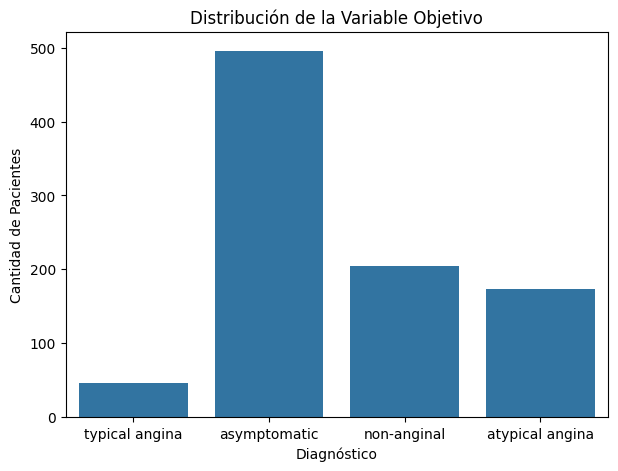

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

Conclusión: El dataset no está bien balanceado.


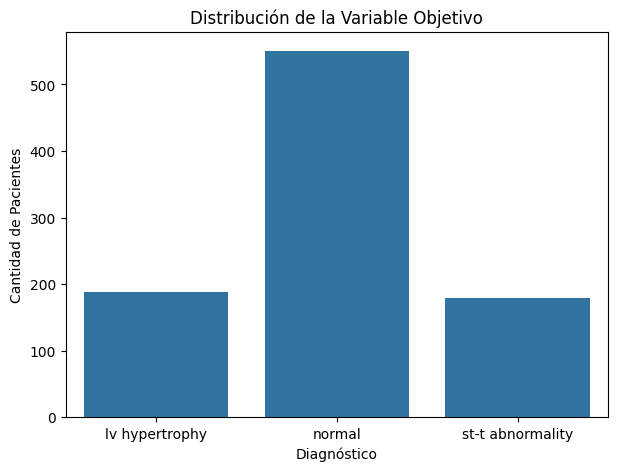

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

Conclusión: El dataset no está bien balanceado.


In [3]:
# Visualizando la distribución de la variable objetivo (cp)
plt.figure(figsize=(7, 5))
sns.countplot(x='cp', data=df)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad de Pacientes')
plt.show()

# Generando el balance para "cp"
balance_cp = df['cp'].value_counts()
print(balance_cp)
print("\nConclusión: El dataset no está bien balanceado.")

# Visualizando la distribución de la variable objetivo (restecg)
plt.figure(figsize=(7, 5))
sns.countplot(x='restecg', data=df)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad de Pacientes')
plt.show()

# Generando el balance para "restecg"
balance_restecg = df['restecg'].value_counts()
print(balance_restecg)
print("\nConclusión: El dataset no está bien balanceado.")

# **¿El dataset está balanceado?**
Podríamos afirmar que **el dataset NO está balanceado** ya que tenemos demasiados registros de un solo diagnostico posible respecto a los demás con una gran cantidad de registros para las variables categóricas revisadas:  
Para **'cp'** tenemos demasiados pacientes como **"asymptomatic"**, exactamente **el 53,9% de los casos.**
mientras que para **'restecg'** la mayoría de **pacientes, el 60%** para ser precisos tienen un **"normal diagnostico"**
Lo que hace que la información del Dataset no esté balanceada. De hecho la información de ambas columnas al completo es la siguiente:

**CP:**
* asymptomatic: 496 -> 53,91%
* non-anginal: 204 -> 22,17%
* atypical angina: 174 -> 18,91%
* typical angina: 46 -> 5%

**RESTEG:**
* normal: 551 -> 60,02%
* lv hypertrophy: 188 -> 20,47%
* st-t abnormality: 179 -> 19,49%



# **- Limpieza y Preprocesamiento**
Se valida si hay valores nulos, al haber, se procede al tratamiento de los mismos con borrados o aplicaciones de media, mediana y moda, según el caso:

In [4]:
# Verificar si hay valores nulos
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())

Cantidad de valores nulos por columna:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [5]:
# Eliminando columnas con muchos valores nulos
columnas_a_eliminar = ['ca', 'thal', 'slope']
df.drop(columns=columnas_a_eliminar, inplace=True)
print("Columnas 'ca', 'thal' y 'slope' eliminadas correctamente")

# Imputando valores nulos en columnas restantes con MEDIANA y MODA

# Imputando columnas numéricas con la MEDIANA
columnas_numericas = ['trestbps', 'chol', 'thalch', 'oldpeak']
for columna in columnas_numericas:
    mediana = df[columna].median()
    df[columna].fillna(mediana, inplace=True)
print("Columnas numéricas imputadas correctamente")

# Imputando columnas categóricas con la MODA
columnas_categoricas = ['fbs', 'restecg', 'exang']
for columna in columnas_categoricas:
    moda = df[columna].mode()[0]
    df[columna].fillna(moda, inplace=True)
print("Columnas categóricas imputadas correctamente")

Columnas 'ca', 'thal' y 'slope' eliminadas correctamente
Columnas numéricas imputadas correctamente
Columnas categóricas imputadas correctamente


/tmp/ipython-input-3862299907.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(mediana, inplace=True)
/tmp/ipython-input-3862299907.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [6]:
# Verificando que no queden valores nulos
print("\n--- Verificación Final de Valores Nulos ---")
print("Conteo de nulos después de la eliminación e imputación:")
print(df.isnull().sum())


--- Verificación Final de Valores Nulos ---
Conteo de nulos después de la eliminación e imputación:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


# **- División y Escalamiento de Datos:**
Se dividen los datos del dataset con train_test_split. El 80% será para entrenar el módelo (alimentarlo de datos) y el 20% restante será para realizar pruebas una vez se escale la primer parte de la data con StandardScaler

**Importante:** StandardScaler es una operación matemática (calcula la media y la desviación estándar) por lo que solo funciona con números, para ello se debe tomar únicamente las columnas con un tipo de dato congruente para su funconamento sin errores

In [13]:
# Separando Dataset en características (X) y variable objetivo (y)
X = df.drop('num', axis=1)
y = df['num']

print("Características y objetivo definidos")
print("Dimensiones iniciales de X:", X.shape)
print("\n" + "="*50 + "\n")


# Identificando / convirtiendo las columnas categóricas (de tipo 'object' (texto)) a numéricas
columnas_categoricas = X.select_dtypes(include=['object']).columns

if not columnas_categoricas.empty:
    print(f"Casteando columnas categóricas: {list(columnas_categoricas)}")
    # Se aplica One-Hot Encoding para convertir el texto a números (0s y 1s)
    X_encoded = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)
    print("Dimensiones de X después del cambio:", X_encoded.shape)
else:
    print("No se encontraron columnas categóricas para codificar")
    X_encoded = X

print("Vista de los datos (ahora 100% numéricos):")
print(X_encoded.head())
print("\n" + "="*50 + "\n")


# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Datos divididos en entrenamiento (80%) y prueba (20%)")
print("Muestras de entrenamiento:", X_train.shape[0])
print("Muestras de prueba:", X_test.shape[0])
print("\n" + "="*50 + "\n")


# Escalando las características ya que, ahora sí, StandardScaler debería funcionar porque todos los datos son numéricos
scaler = StandardScaler()

# Ajustando el escalador solo con los datos de entrenamiento y se transforman
X_train_scaled = scaler.fit_transform(X_train)

# Transformando los datos de prueba con el escalador (ya ajustado)
X_test_scaled = scaler.transform(X_test)

print("Datos escalados exitosamente! (por fin)")
print("Las variables 'X_train_scaled' y 'X_test_scaled' están listas para el modelo")

Características y objetivo definidos
Dimensiones iniciales de X: (920, 12)


Casteando columnas categóricas: ['sex', 'dataset', 'cp', 'restecg']
Dimensiones de X después del cambio: (920, 17)
Vista de los datos (ahora 100% numéricos):
   id  age  trestbps   chol    fbs  thalch  exang  oldpeak  sex_Male  \
0   1   63     145.0  233.0   True   150.0  False      2.3      True   
1   2   67     160.0  286.0  False   108.0   True      1.5      True   
2   3   67     120.0  229.0  False   129.0   True      2.6      True   
3   4   37     130.0  250.0  False   187.0  False      3.5      True   
4   5   41     130.0  204.0  False   172.0  False      1.4     False   

   dataset_Hungary  dataset_Switzerland  dataset_VA Long Beach  \
0            False                False                  False   
1            False                False                  False   
2            False                False                  False   
3            False                False                  False   
4 

# **- Entrenamiento del Modelo:**
Se crea el modelo (LogisticRegression) y se entrena con fit

In [15]:
# Creando y entrenando al modelo de LogisticRegression
modelo = LogisticRegression()
modelo.fit(X_train_scaled, y_train)

print("Modelo de Regresión entrenado exitosamente!")

Modelo de Regresión entrenado exitosamente!


# **- Predicción y Evaluación + Métricas de Rendimiento:**
Se prueba el modelo con el 20% de la data destinada para ello, creando una predicción con predict() y de paso se calculan sus métricas tanto "Accuracy" como "La Matriz de Confusión"

La exactitud (Accuracy) del modelo es: 0.54


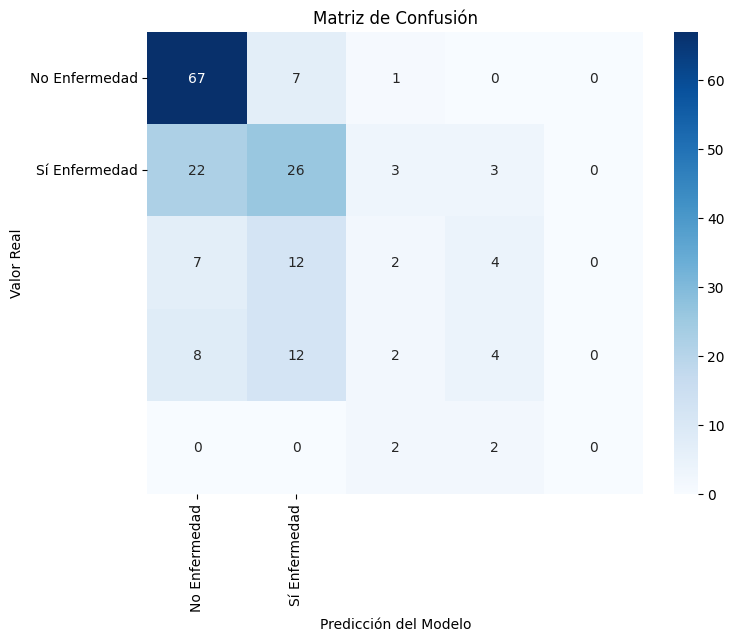

In [16]:
# Usando el modelo entrenado para hacer predicciones sobre el set de prueba
prediction = modelo.predict(X_test_scaled)

# Calculando la exactitud (Accuracy)
accuracy = accuracy_score(y_test, prediction)
print(f"La exactitud (Accuracy) del modelo es: {accuracy:.2f}")

# Calculando la Matriz de Confusión
cm = confusion_matrix(y_test, prediction)

# Visualizando la Matriz de Confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Enfermedad', 'Sí Enfermedad'],
            yticklabels=['No Enfermedad', 'Sí Enfermedad'])
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción del Modelo')
plt.show()

## **Conclusión del Proyecto**

El objetivo de este proyecto era construir un modelo de machine learning para clasificar si un paciente tiene una enfermedad cardíaca basándose en datos clínicos. Se utilizó un modelo de **Regresión Logística**.

### **Rendimiento del Modelo**

El modelo alcanzó una **exactitud (accuracy) de aproximadamente 0.5 (50%)** en el conjunto de datos de prueba. Esto significa que la mitad de las veces, el modelo fue capaz de predecir correctamente si un paciente tenía o no una enfermedad cardíaca y esto es bueno, teniendo en cuenta que se trata de una muestra o conjunto de datos desequilibrados (dataset desbalanceado).

En resumen, el modelo de Regresión Logística demuestra ser un clasificador funcional y prometedor para esta tarea, con un buen equilibrio entre la predicción de pacientes sanos y enfermos.